In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.0.0


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [21]:
print(len(train))
print(len(test))

2048
20480


In [22]:
print(test)

          id letter  0  1  2  3  4  5  6  7  ...  774  775  776  777  778  \
0       2049      L  0  4  0  2  4  2  3  1  ...    2    0    4    2    2   
1       2050      C  4  1  4  0  1  1  0  2  ...    0    3    2    4    2   
2       2051      S  0  4  0  1  3  2  3  0  ...    1    3    2    0    3   
3       2052      K  2  1  3  3  3  4  3  0  ...    3    0    3    2    4   
4       2053      W  1  0  1  1  2  2  1  4  ...    4    3    1    4    0   
...      ...    ... .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...   
20475  22524      P  1  2  1  1  0  0  0  2  ...    0    1    3    0    3   
20476  22525      S  4  1  1  4  0  0  1  1  ...    1    3    1    0    0   
20477  22526      B  4  2  1  3  2  1  3  0  ...    3    2    3    4    1   
20478  22527      K  1  1  2  3  4  0  4  3  ...    2    0    0    4    3   
20479  22528      S  2  1  0  3  0  3  3  1  ...    0    3    0    1    4   

       779  780  781  782  783  
0        4    3    4    1    4  
1        

In [23]:
print(train)

        id  digit letter  0  1  2  3  4  5  6  ...  774  775  776  777  778  \
0        1      5      L  1  1  1  4  3  0  0  ...    2    1    0    1    2   
1        2      0      B  0  4  0  0  4  1  1  ...    0    3    0    1    4   
2        3      4      L  1  1  2  2  1  1  1  ...    3    3    3    0    2   
3        4      9      D  1  2  0  2  0  4  0  ...    3    3    2    0    1   
4        5      6      A  3  0  2  4  0  3  0  ...    4    4    3    2    1   
...    ...    ...    ... .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...   
2043  2044      6      V  2  4  3  4  2  4  4  ...    0    2    2    0    0   
2044  2045      1      L  3  2  2  1  1  4  0  ...    2    3    4    2    1   
2045  2046      9      A  4  0  4  0  2  4  4  ...    2    3    1    1    3   
2046  2047      0      Z  2  3  3  0  3  0  4  ...    2    3    1    1    0   
2047  2048      5      Z  4  2  2  1  3  0  0  ...    4    2    4    0    4   

      779  780  781  782  783  
0       4    4    4

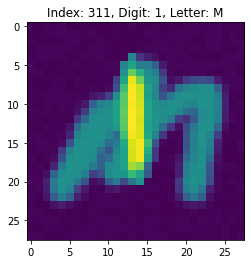

In [3]:
idx = 311
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [4]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y): ## 원핫인코딩
    y_train[i, digit] = 1

In [5]:
# datagen = ImageDataGenerator(
#         rotation_range=10,  
#         zoom_range = 0.10,  
#         width_shift_range=0.1, 
#         height_shift_range=0.1)

In [23]:
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv2D, Input, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

def create_cnn_model(x_train):
    
    model =  Sequential()
    
    ## 특징 추출
    model.add(Conv2D(input_shape = (28,28,1),filters = 32, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    ## 인풋인 28*28를 2*2로 짜른 27*27를 32개 출력
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    ## 27*27를 2*2로 64장 출력
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(128, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    ## 26*26를 2*2로 128장 출력
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(256, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size = 2, strides = 1, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    ## 분류기
    model.add(BatchNormalization())
    model.add(Dense(1500, input_dim = 784,activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(1500, input_dim = 784,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
     
    return model

## 64, 128, 256을 한층씩 추가 + dropout 추가

In [24]:
model = create_cnn_model(x_train)

In [25]:
history = model.fit(x_train, y_train, epochs=20, batch_size = 20)
# history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=20)

Train on 2048 samples
Epoch 1/20
2048/2048 [==============================] - 84s 41ms/sample - loss: 3.2972 - accuracy: 0.1094
Epoch 2/20
2048/2048 [==============================] - 77s 38ms/sample - loss: 3.1995 - accuracy: 0.1304
Epoch 3/20
2048/2048 [==============================] - 83s 40ms/sample - loss: 2.9080 - accuracy: 0.1372
Epoch 4/20
2048/2048 [==============================] - 77s 38ms/sample - loss: 2.6593 - accuracy: 0.1528
Epoch 5/20
2048/2048 [==============================] - 71s 35ms/sample - loss: 2.4709 - accuracy: 0.1704
Epoch 6/20
2048/2048 [==============================] - 80s 39ms/sample - loss: 2.2409 - accuracy: 0.2114
Epoch 7/20
2048/2048 [==============================] - 78s 38ms/sample - loss: 2.1968 - accuracy: 0.2290
Epoch 8/20
2048/2048 [==============================] - 87s 43ms/sample - loss: 2.0515 - accuracy: 0.2612
Epoch 9/20
2048/2048 [==============================] - 89s 43ms/sample - loss: 1.9550 - accuracy: 0.3076
Epoch 10/20
2048/2048 [=

In [26]:
results = model.evaluate(x_train, y_train)
results ## 76 모델 [0.5142705249600112, 0.81933594]
## 1200일때 [0.49654440907761455, 0.828125]
## 1500일때 [0.5246944308746606, 0.8354492] -> 78
## conv2d층 추가 [0.46263988222926855, 0.84814453]

2048/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.044433715287596, 0.7163086]

In [29]:
history = model.fit(x_train, y_train, epochs=5, batch_size = 20) ## 30번 학습

Train on 2048 samples
Epoch 1/5
2048/2048 [==============================] - 77s 38ms/sample - loss: 0.9109 - accuracy: 0.7056
Epoch 2/5
2048/2048 [==============================] - 73s 36ms/sample - loss: 0.8694 - accuracy: 0.7305
Epoch 3/5
2048/2048 [==============================] - 69s 34ms/sample - loss: 0.8426 - accuracy: 0.7300
Epoch 4/5
2048/2048 [==============================] - 76s 37ms/sample - loss: 0.8217 - accuracy: 0.7393
Epoch 5/5
2048/2048 [==============================] - 75s 36ms/sample - loss: 0.8114 - accuracy: 0.7349


In [30]:
results = model.evaluate(x_train, y_train)
results 

2048/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.37449838407337666, 0.8745117]

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

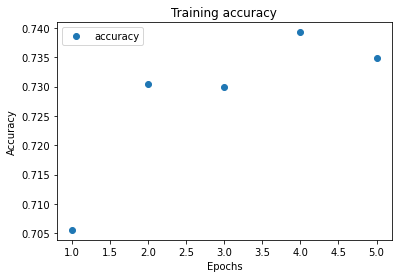

In [32]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
# plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, acc, 'o', label='accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [33]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('./submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head(20)

,id,digit
0,2049,6
1,2050,9
2,2051,3
3,2052,0
4,2053,3
5,2054,7
6,2055,5
7,2056,3
8,2057,4
9,2058,4


In [34]:
submission.to_csv('baseline.csv', index=False)